Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler



from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

Read Dataset

In [3]:
path = '/content/drive/MyDrive/CSE422 project/FINAL DATASET.csv'
data = pd.read_csv(path)
data.shape

(1028, 16)

Dataset Analysis


In [4]:
print("Shape:", data.shape)

Shape: (1028, 16)


In [5]:
print("Columns:", data.columns)

Columns: Index(['age', 'sex', 'chestpain', 'trestbps', 'chol', 'fps', 'restecg',
       'Others', 'income', 'thalach', 'exang', 'oldpeak', 'slop', 'ca', 'thal',
       'target'],
      dtype='object')


In [6]:
print("Head:", data.head())

Head:     age sex       chestpain  trestbps   chol    fps  restecg  Others  income  \
0  52.0   M  Typical angina     125.0  212.0  False     ST-T     0.0  146777   
1  53.0   M  Typical angina     140.0  203.0   True  Nothing    18.0  132280   
2  70.0   M  Typical angina     145.0  174.0  False     ST-T     NaN  168352   
3  61.0   M  Typical angina     148.0  203.0  False     ST-T    29.0  179138   
4  62.0   F  Typical angina     138.0  294.0   True     ST-T     NaN  179896   

   thalach exang  oldpeak         slop  ca  thal target  
0    168.0    No      1.0  Downsloping   2   3.0     No  
1    155.0   Yes      3.1    Upsloping   0   3.0     No  
2    125.0   Yes      2.6    Upsloping   0   3.0     No  
3      NaN    No      0.0  Downsloping   1   3.0     No  
4    106.0    No      1.9  Flatsloping   3   2.0     No  


In [7]:
print("Tail:", data.tail())

Tail:        age sex        chestpain  trestbps   chol    fps  restecg  Others  \
1023  59.0   M  Atypical angina     140.0  221.0  False     ST-T     NaN   
1024  60.0   M   Typical angina     125.0  258.0  False  Nothing     NaN   
1025   NaN   M   Typical angina     110.0  275.0  False  Nothing     NaN   
1026  50.0   F              NaN     110.0  254.0  False  Nothing     NaN   
1027  54.0   M   Typical angina     120.0  188.0  False     ST-T     NaN   

      income  thalach exang  oldpeak         slop  ca  thal target  
1023  163012    164.0   Yes      0.0  Downsloping   0   2.0    Yes  
1024  154899    141.0   Yes      2.8  Flatsloping   1   3.0     No  
1025  105708    118.0   Yes      1.0  Flatsloping   1   2.0     No  
1026  165442    159.0    No      0.0  Downsloping   0   2.0    Yes  
1027  104709    113.0    No      1.4  Flatsloping   1   3.0     No  


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1010 non-null   float64
 1   sex        1028 non-null   object 
 2   chestpain  1012 non-null   object 
 3   trestbps   1014 non-null   float64
 4   chol       1020 non-null   float64
 5   fps        1024 non-null   object 
 6   restecg    1010 non-null   object 
 7   Others     221 non-null    float64
 8   income     1028 non-null   int64  
 9   thalach    1005 non-null   float64
 10  exang      1027 non-null   object 
 11  oldpeak    1022 non-null   float64
 12  slop       1020 non-null   object 
 13  ca         1028 non-null   int64  
 14  thal       1001 non-null   float64
 15  target     1028 non-null   object 
dtypes: float64(7), int64(2), object(7)
memory usage: 128.6+ KB


In [9]:
print("Describe:\n", data.describe())

Describe:
                age     trestbps         chol      Others         income  \
count  1010.000000  1014.000000  1020.000000  221.000000    1028.000000   
mean     54.437624   131.647929   246.068627   32.280543  149393.036965   
std       9.082300    17.603265    51.459934   13.466221   29364.863244   
min      29.000000    94.000000   126.000000    0.000000  100000.000000   
25%      48.000000   120.000000   211.000000   22.000000  122843.750000   
50%      56.000000   130.000000   240.000000   32.000000  149347.500000   
75%      61.000000   140.000000   275.000000   42.000000  175080.000000   
max      77.000000   200.000000   564.000000   68.000000  199803.000000   

           thalach      oldpeak           ca         thal  
count  1005.000000  1022.000000  1028.000000  1001.000000  
mean    149.104478     1.075342     0.751946     2.320679  
std      23.056099     1.175142     1.030095     0.619727  
min      71.000000     0.000000     0.000000     0.000000  
25%     132.0

In [10]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 age           18
sex            0
chestpain     16
trestbps      14
chol           8
fps            4
restecg       18
Others       807
income         0
thalach       23
exang          1
oldpeak        6
slop           8
ca             0
thal          27
target         0
dtype: int64


In [11]:
data["target"].value_counts()

Yes    528
No     500
Name: target, dtype: int64

<Axes: >

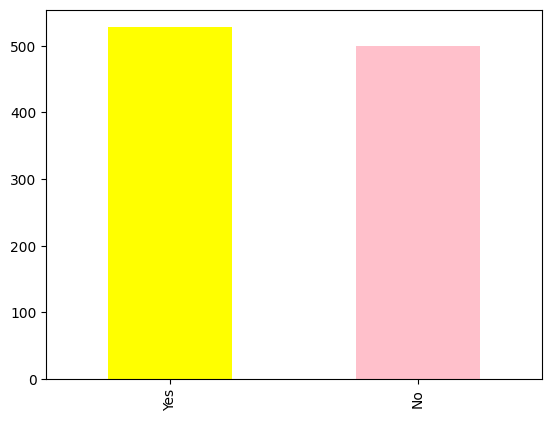

In [12]:
data["target"].value_counts().plot(kind="bar", color=["yellow", "pink"])

**Dataset Pre-processing**

Dropping columns

In [13]:
data = data.drop(['Others'], axis = 1)
print("Shape after dropping:", data.shape)

Shape after dropping: (1028, 15)


Dropping rows

In [14]:
print("Number of rows with null values in oldpeak column: ", data['oldpeak'].isnull().sum())

data = data.dropna(axis = 0, subset = ['oldpeak'])

print("Shape after dropping:", data.shape)

Number of rows with null values in oldpeak column:  6
Shape after dropping: (1022, 15)


Imputing Null values

In [15]:
data.isna().sum()

age          18
sex           0
chestpain    16
trestbps     14
chol          8
fps           4
restecg      18
income        0
thalach      23
exang         1
oldpeak       0
slop          8
ca            0
thal         27
target        0
dtype: int64

In [16]:
mean_age = data['age'].mean()

data['age'] = data['age'].fillna(int(mean_age))

In [17]:
median_chol = data['chol'].median()

data['chol'] = data['chol'].fillna(median_chol)

In [18]:
median_trestbps = data['trestbps'].median()

data['trestbps'] = data['trestbps'].fillna(median_trestbps)

In [19]:
median_thalach = data['thalach'].median()

data['thalach'] = data['thalach'].fillna(median_thalach)

In [20]:
median_thal = data['thal'].median()

data['thal'] = data['thal'].fillna(median_thal)

In [21]:
data.isna().sum()

age           0
sex           0
chestpain    16
trestbps      0
chol          0
fps           4
restecg      18
income        0
thalach       0
exang         1
oldpeak       0
slop          8
ca            0
thal          0
target        0
dtype: int64

Removing Null values

In [22]:
data = data.dropna(axis=0)

In [23]:
data.isnull().sum()

age          0
sex          0
chestpain    0
trestbps     0
chol         0
fps          0
restecg      0
income       0
thalach      0
exang        0
oldpeak      0
slop         0
ca           0
thal         0
target       0
dtype: int64

In [24]:
data.shape

(977, 15)

Encoding Categorical features

In [25]:
data['sex'].unique()

array(['M', 'F'], dtype=object)

In [26]:
data['sex'] = data['sex'].map({'M': 1, 'F': 0})

In [27]:
data['chestpain'].unique()

array(['Typical angina', 'Atypical angina', 'Non-anginal pain',
       'Asymptomatic'], dtype=object)

In [28]:
data['chestpain'] = data['chestpain'].map({'Typical angina':0, 'Atypical angina':1, 'Non-anginal pain':2,'Asymptomatic':3})

In [29]:
data['fps'].unique()

array([False, True], dtype=object)

In [30]:
data['fps'] = data['fps'].astype(int)

In [31]:
data['restecg'].unique()

array(['ST-T', 'Nothing', 'Possible'], dtype=object)

In [32]:
data['restecg'] = data['restecg'].map({'Nothing':0,'ST-T':1,'Possible':2})

In [33]:
data['exang'].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
data['exang'] = data['exang'].map({'Yes':1,'No':0})

In [35]:
data['slop'].unique()

array(['Downsloping', 'Upsloping', 'Flatsloping'], dtype=object)

In [36]:
data['slop'] = data['slop'].map({'Upsloping':0,'Downsloping':2,'Flatsloping':1})

In [37]:
data['target'].unique()

array(['No', 'Yes'], dtype=object)

In [38]:
data['target'] = data['target'].map({'Yes':1,'No':0})

In [39]:
data.head()

,age,sex,chestpain,trestbps,chol,fps,restecg,income,thalach,exang,oldpeak,slop,ca,thal,target
0,52.0,1,0,125.0,212.0,0,1,146777,168.0,0,1.0,2,2,3.0,0
1,53.0,1,0,140.0,203.0,1,0,132280,155.0,1,3.1,0,0,3.0,0
2,70.0,1,0,145.0,174.0,0,1,168352,125.0,1,2.6,0,0,3.0,0
3,61.0,1,0,148.0,203.0,0,1,179138,152.0,0,0.0,2,1,3.0,0
4,62.0,0,0,138.0,294.0,1,1,179896,106.0,0,1.9,1,3,2.0,0


Feature Scaling


In [40]:
data.head()

,age,sex,chestpain,trestbps,chol,fps,restecg,income,thalach,exang,oldpeak,slop,ca,thal,target
0,52.0,1,0,125.0,212.0,0,1,146777,168.0,0,1.0,2,2,3.0,0
1,53.0,1,0,140.0,203.0,1,0,132280,155.0,1,3.1,0,0,3.0,0
2,70.0,1,0,145.0,174.0,0,1,168352,125.0,1,2.6,0,0,3.0,0
3,61.0,1,0,148.0,203.0,0,1,179138,152.0,0,0.0,2,1,3.0,0
4,62.0,0,0,138.0,294.0,1,1,179896,106.0,0,1.9,1,3,2.0,0


In [41]:
scaler = MinMaxScaler()
scaler.fit(data)
S_data = scaler.transform(data)

In [42]:
S_data

array([[0.47916667, 1.        , 0.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.85416667, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.64583333, 1.        , 0.        , ..., 0.25      , 1.        ,
        0.        ],
       [0.52083333, 1.        , 0.        , ..., 0.25      , 0.66666667,
        0.        ],
       [0.52083333, 1.        , 0.        , ..., 0.25      , 1.        ,
        0.        ]])

Feature Selection


Selecting relevant features

Sometimes certain circumstances arise that we have a lot of features in our dataset, but from our prior/domain knowledge we know that certain features might not be too important. In such cases we may want to drop those irrelevant features.

In [43]:
# Create a list of redundant column names to drop
to_drop = ["income"]

data = data.drop(to_drop, axis=1)

data.head()

,age,sex,chestpain,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slop,ca,thal,target
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3.0,0
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3.0,0
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3.0,0
3,61.0,1,0,148.0,203.0,0,1,152.0,0,0.0,2,1,3.0,0
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2.0,0


We may use the following heatmap to find out the correlation between each of the features in a dataset. If a certain feature is highly correlated with more than one feature, we may choose to drop that feature because it will affect our model in a similar way as the other features. Correlation between two features may be found using the color gradient shown on the right.

(14.5, -0.5)

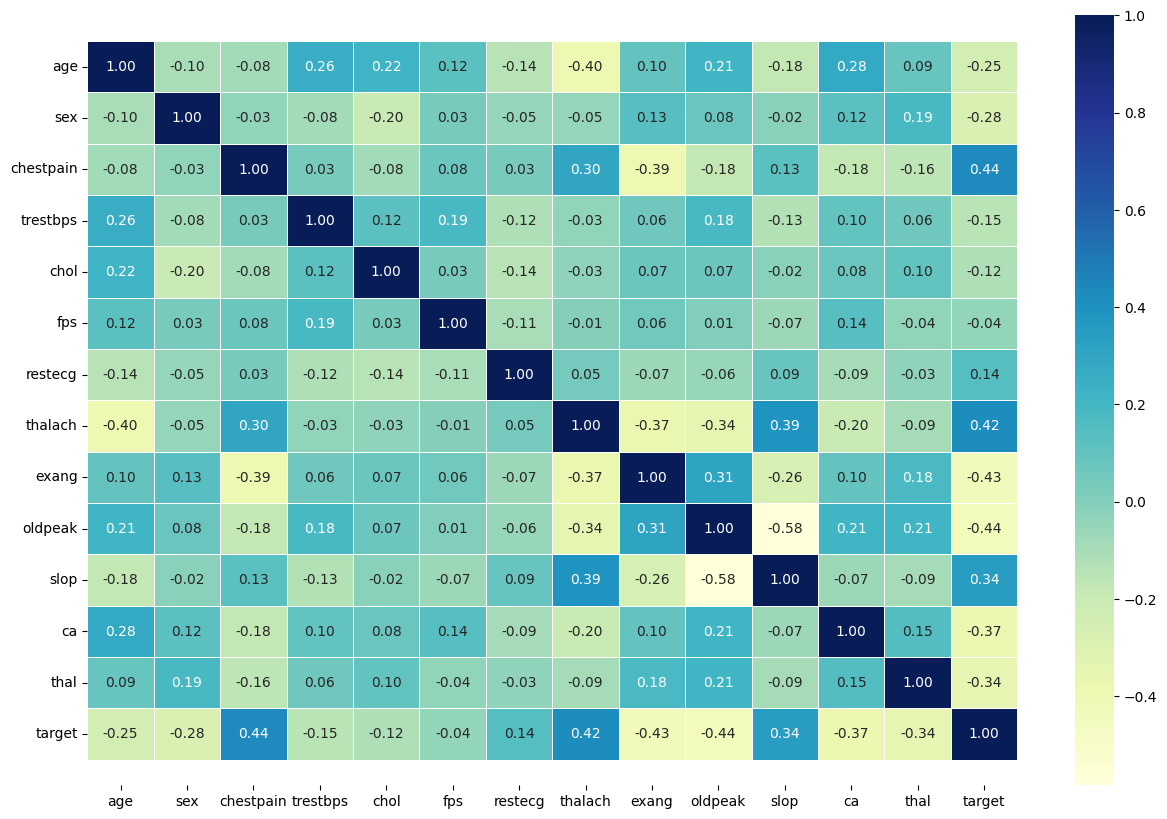

In [44]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [45]:
#to_drop = ''
#data = data.drop(to_drop, axis=1)

Heart desease frequency according to sex

In [46]:
data.sex.value_counts()

1    686
0    291
Name: sex, dtype: int64

In [47]:
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,81,398
1,210,288


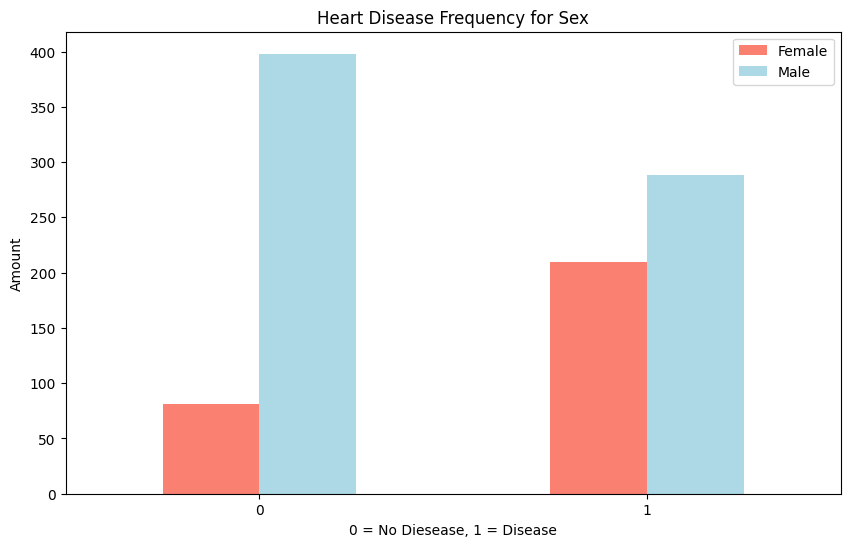

In [48]:
pd.crosstab(data.target, data.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

Age vs. Max Heart Rate for Heart Disease

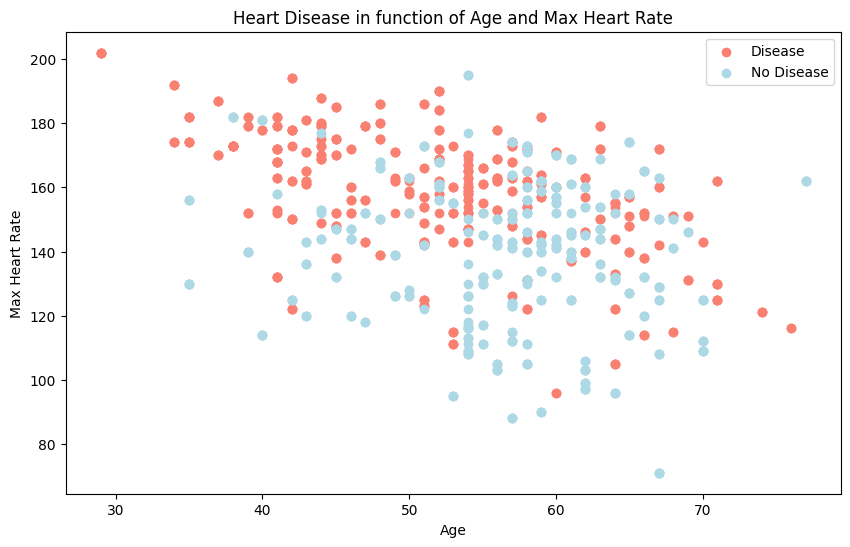

In [49]:
plt.figure(figsize=(10, 6))


plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="salmon")


plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c="lightblue")


plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

<Axes: ylabel='Frequency'>

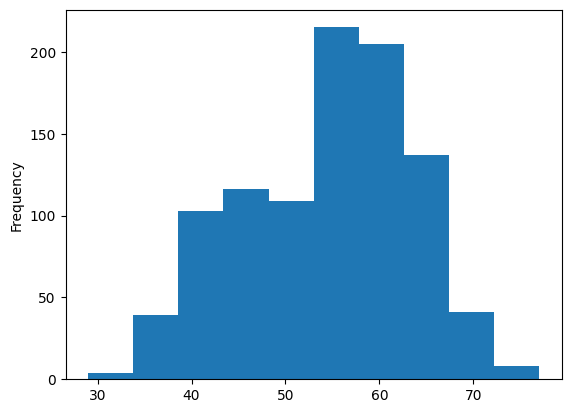

In [50]:
data.age.plot.hist()

Heart Disease Frequency per Chest Pain Type

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

In [51]:
pd.crosstab(data.chestpain, data.target)

target,0,1
chestpain,,
0,361,116
1,31,127
2,63,206
3,24,49


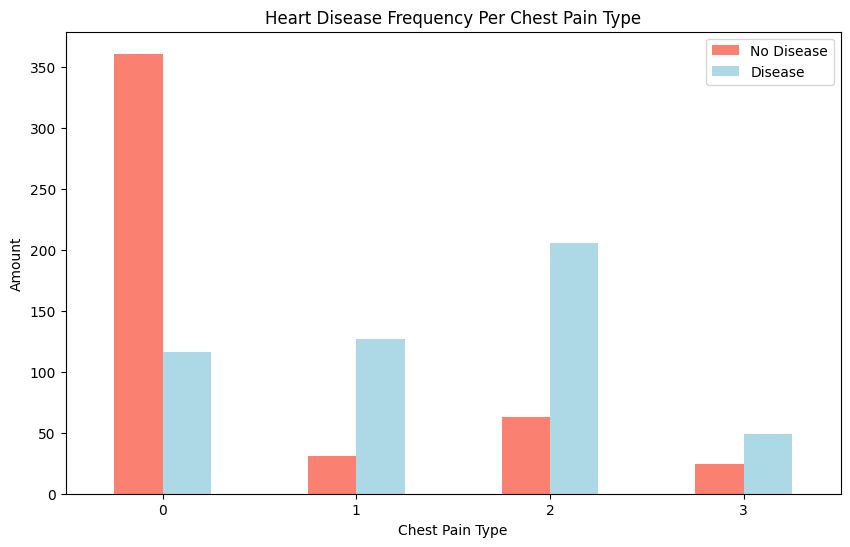

In [52]:
pd.crosstab(data.chestpain, data.target).plot(kind="bar",figsize=(10, 6),color=["salmon", "lightblue"])


plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

Dataset Splitting

In [53]:
X = data.drop("target", axis=1)

y = data["target"]

In [54]:
X

,age,sex,chestpain,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slop,ca,thal
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3.0
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3.0
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3.0
3,61.0,1,0,148.0,203.0,0,1,152.0,0,0.0,2,1,3.0
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,47.0,1,0,112.0,204.0,0,1,143.0,0,0.1,2,0,2.0
1023,59.0,1,1,140.0,221.0,0,1,164.0,1,0.0,2,0,2.0
1024,60.0,1,0,125.0,258.0,0,0,141.0,1,2.8,1,1,3.0
1025,54.0,1,0,110.0,275.0,0,0,118.0,1,1.0,1,1,2.0


In [55]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1022    1
1023    1
1024    0
1025    0
1027    0
Name: target, Length: 977, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

**Dataset Training**

KNN

In [57]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

#Find F1 Accuracy
f1 = f1_score(y_test,y_pred)
print("F1 accuracy:{:.2f}%".format(f1 * 100))
# Print accuracy and confusion matrix
print("Accuracy: {:.2f}%".format(accuracy1 * 100))
#print("Confusion Matrix:\n", confusion_mat)

F1 accuracy:75.16%
Accuracy: 73.47%


<Axes: >

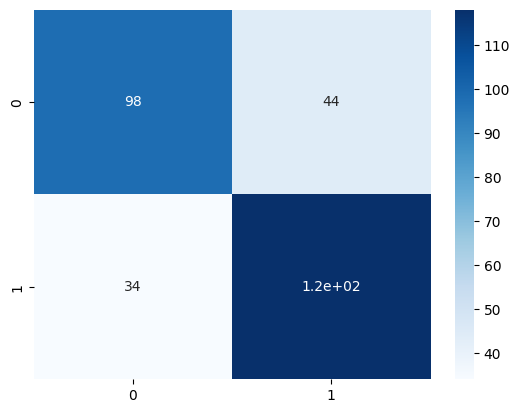

In [58]:
#import seaborn as sns

sns.heatmap(confusion_mat, annot=True, cmap='Blues')

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.72       142
           1       0.73      0.78      0.75       152

    accuracy                           0.73       294
   macro avg       0.74      0.73      0.73       294
weighted avg       0.74      0.73      0.73       294



Decision Tree

In [60]:
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)



y_true = y_test # true class labels of test set
y_pred = clf.predict(X_test) # predicted class labels of test set

cm = confusion_matrix(y_true, y_pred)

#Find F1 Accuracy
f1 = f1_score(y_test,y_pred)
print("F1 accuracy:{:.2f}%".format(f1 * 100))
# Calculate accuracy of the model
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy2 * 100))

#print(cm)

F1 accuracy:99.00%
Accuracy: 98.98%


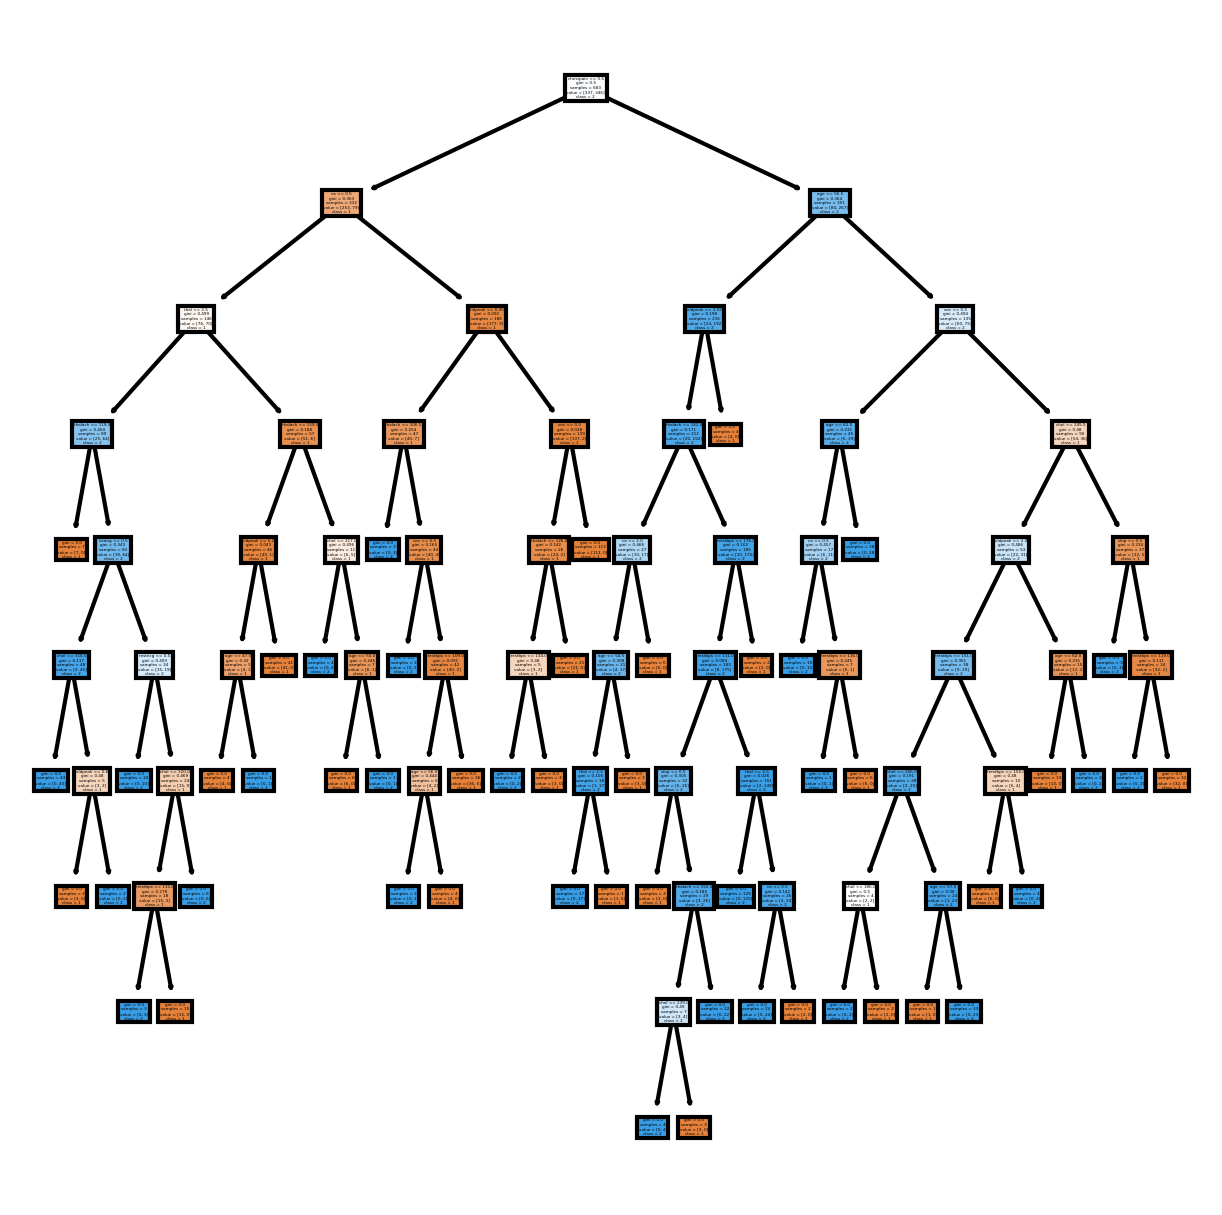

In [61]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(clf,
               feature_names = X.columns,
               class_names=['1','2','3','4','5','6','7'],
               filled = True);

<Axes: >

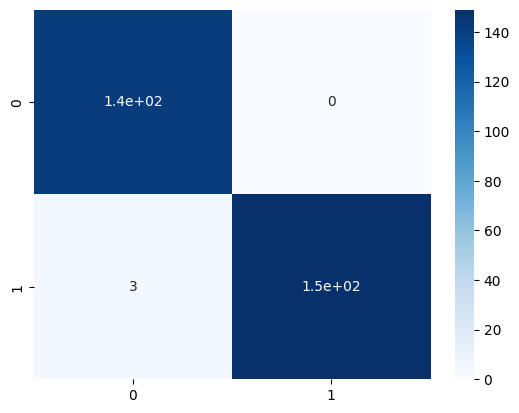

In [62]:
#import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues')

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       142
           1       1.00      0.98      0.99       152

    accuracy                           0.99       294
   macro avg       0.99      0.99      0.99       294
weighted avg       0.99      0.99      0.99       294



SVM

In [64]:
clf = SVC(kernel='poly')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

y_true = y_test
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_true, y_pred)


#Find F1 Accuracy
f1 = f1_score(y_test,y_pred)
print("F1 accuracy:{:.2f}%".format(f1 * 100))
# Calculate accuracy of the model
accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy3 * 100))
print(cm)

F1 accuracy:71.61%
Accuracy: 70.07%
[[ 95  47]
 [ 41 111]]


<Axes: >

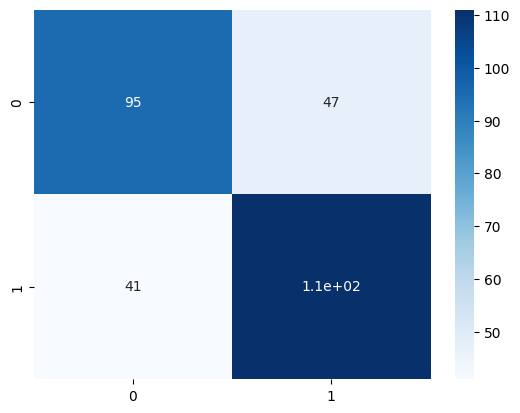

In [65]:
#import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues')

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68       142
           1       0.70      0.73      0.72       152

    accuracy                           0.70       294
   macro avg       0.70      0.70      0.70       294
weighted avg       0.70      0.70      0.70       294



Logistic Regression

In [67]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy4 = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

#Find F1 Accuracy
f1 = f1_score(y_test,y_pred)
print("F1 accuracy:{:.2f}%".format(f1 * 100))
# Print accuracy and confusion matrix
print("Accuracy: {:.2f}%".format(accuracy4 * 100))
#print("Confusion Matrix:\n", confusion_mat)

F1 accuracy:87.23%
Accuracy: 86.05%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

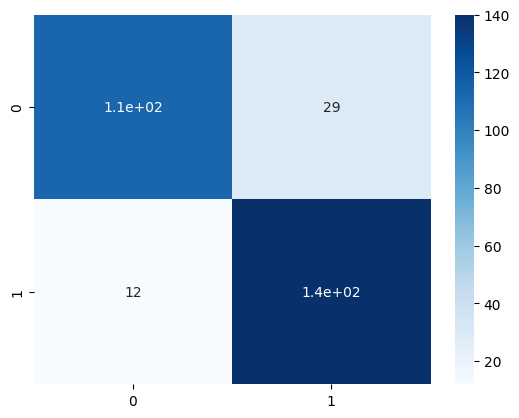

In [68]:
#import seaborn as sns

sns.heatmap(confusion_mat, annot=True, cmap='Blues')

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       142
           1       0.83      0.92      0.87       152

    accuracy                           0.86       294
   macro avg       0.87      0.86      0.86       294
weighted avg       0.86      0.86      0.86       294



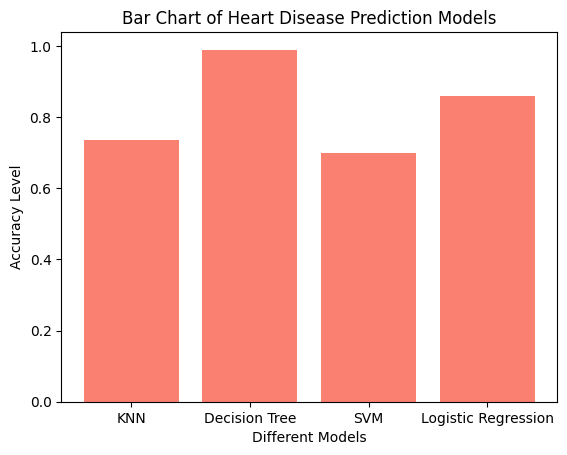

In [70]:
#import matplotlib.pyplot as plt

x_axis = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
y_axis = [accuracy1, accuracy2, accuracy3, accuracy4]

plt.bar(x_axis, y_axis,color= 'salmon')
plt.title('Bar Chart of Heart Disease Prediction Models')
plt.xlabel('Different Models')
plt.ylabel('Accuracy Level')
plt.show()